In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as la
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from statistics import mean
import statistics
from math import sqrt
from math import pi
from math import exp

In [2]:
data = pd.read_csv('Iris.csv')
print (data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.drop('Id',axis=1,inplace=True)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# division des données en inputs & labells division des données en train, test
inputs=data.iloc[:,:-1]
labells=data.iloc[:,-1]
train_input,test_input,train_labells,test_labells=train_test_split(inputs,labells,test_size=0.2,random_state=0)

# 1. k-plus proches voisins

### 1.1) Implémentation de l’algorithme k-nn pour la prédiction d’une nouvelle observation

In [9]:
# function to find distances based on euclidian distance
def distance(x, xi):
    x=np.array(x)
    xi=np.array(xi)
    return la.norm(x - xi)

In [10]:
def getNeighbours(x_test, x_train, y_train, k):
        distances=[]
        for i in range(len(x_train)):
            d=distance(x_train.iloc[i],x_test)
            distances.append((d,y_train.iloc[i]))# ajout de la distance et de la classe 
        distances.sort(key=lambda x:x[0])# réorganisation des distances selon l'ordre de la 1ére colonne
        return distances[:k]

In [11]:
# algorithm
y_predict=[]
for i in range(len(test_input)):
    x=test_input.iloc[i]
    x=np.array(x)
    nei=getNeighbours(x, train_input, train_labells, 5)
    y_predict.append( mode( nei )[0][0])
for i in range(len(y_predict)):
    y_predict[i]=y_predict[i][1]

In [12]:
print(y_predict)

['Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa']


In [13]:
metrics.precision_recall_fscore_support(test_labells, y_predict, average='micro')

(0.9666666666666667, 0.9666666666666667, 0.9666666666666667, None)

In [14]:
metrics.accuracy_score(test_labells, y_predict)

0.9666666666666667

### 1.2)  Evaluation des performances de l’approche des k-plus porches voisins en termes de taux de bonne classification, rappel, précision et f-mesure en se basant sur la méthode de validation croisée (10-fold cross validation)

In [15]:
kf = KFold( n_splits=10, shuffle=True)# shuffle = true pour une permutation des individus avant division

In [16]:
kf.get_n_splits(data)

10

In [17]:
accuracys=[]
matrices=[]
metric=[]
for train_index, test_index in kf.split(data):
    kf_train_imputs=data.iloc[train_index,:-1]
    kf_test_imputs=data.iloc[test_index,:-1]
    kf_train_labells=data.iloc[train_index,-1]
    kf_test_labells=data.iloc[test_index,-1]
    kf_y_predict=[]
    for i in range(len(kf_test_imputs)):
        x=kf_test_imputs.iloc[i]
        x=np.array(x)
        nei=getNeighbours(x, kf_train_imputs, kf_train_labells, 5)
        kf_y_predict.append( mode( nei )[0][0])
    for i in range(len(kf_y_predict)):
        kf_y_predict[i]=kf_y_predict[i][1]
    accuracys.append(accuracy_score(kf_test_labells, kf_y_predict))
    metric.append(precision_recall_fscore_support(kf_test_labells, kf_y_predict, average='macro'))
    matrices.append(confusion_matrix(kf_test_labells, kf_y_predict))
performances=pd.DataFrame(metric, columns=['Précision', 'Rappel', 'f1', 'a']).drop(columns='a')
performances["Accuracy"]=pd.DataFrame(accuracys)[0].copy()
performances

,Précision,Rappel,f1,Accuracy
0,1.000000,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000,1.000000
2,0.916667,0.952381,0.926740,0.933333
3,0.958333,0.916667,0.930159,0.933333
4,0.916667,0.952381,0.926740,0.933333
5,1.000000,1.000000,1.000000,1.000000
6,1.000000,1.000000,1.000000,1.000000
7,0.833333,0.916667,0.841270,0.866667
8,1.000000,1.000000,1.000000,1.000000
9,0.944444,0.944444,0.939394,0.933333


In [18]:
mean(accuracys)

0.96

In [19]:
matrices

[array([[3, 0, 0],
        [0, 6, 0],
        [0, 0, 6]], dtype=int64),
 array([[7, 0, 0],
        [0, 5, 0],
        [0, 0, 3]], dtype=int64),
 array([[5, 0, 0],
        [0, 6, 1],
        [0, 0, 3]], dtype=int64),
 array([[4, 0, 0],
        [0, 3, 1],
        [0, 0, 7]], dtype=int64),
 array([[5, 0, 0],
        [0, 6, 1],
        [0, 0, 3]], dtype=int64),
 array([[5, 0, 0],
        [0, 2, 0],
        [0, 0, 8]], dtype=int64),
 array([[8, 0, 0],
        [0, 5, 0],
        [0, 0, 2]], dtype=int64),
 array([[5, 0, 0],
        [0, 2, 0],
        [0, 2, 6]], dtype=int64),
 array([[4, 0, 0],
        [0, 7, 0],
        [0, 0, 4]], dtype=int64),
 array([[4, 0, 0],
        [0, 5, 0],
        [0, 1, 5]], dtype=int64)]

### 1.3)  la matrice de confusion.

In [20]:
confusion_matrix(test_labells, y_predict)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

### 1.4) Analyse des résultats obtenus. 

On peut qualifier les résultats de bon résultats.
Malgré que le classifieur est testé sur de nouvelles donnée à chaque fois avec des proportions des trois types de fleurs différentes d'un test set à un autre, le classifieur a montré une précision minimale de 83%. A ce niveau, vu la non équiprobbilité des individus dans le test set; il est judicieux d'evaluer les performances du classifieur selon la précision, le rappel, mais mieux le f1 score. Pour voir sa claire, il suffit de regarder l'accuracy score qui est identique à plusieurs itérations du test set alors que les trois autres ne le sont point.   

### 1.5)  1.2 et 1.3 en utilisant la bibliothèque scikit learn

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
accuracys=[]
matrices=[]
metric=[]
for train_index, test_index in kf.split(data):
    kf_train_imputs=data.iloc[train_index,:-1]
    kf_test_imputs=data.iloc[test_index,:-1]
    kf_train_labells=data.iloc[train_index,-1]
    kf_test_labells=data.iloc[test_index,-1]
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(kf_train_imputs,kf_train_labells)
    kf_y_predict=knn.predict(kf_test_imputs)
    accuracys.append(accuracy_score(kf_test_labells, kf_y_predict))
    metric.append(precision_recall_fscore_support(kf_test_labells, kf_y_predict, average='micro'))
    matrices.append(confusion_matrix(kf_test_labells, kf_y_predict))
performances=pd.DataFrame(metric, columns=['Précision', 'Rappel', 'f1', 'a']).drop(columns='a')
performances["Accuracy"]=pd.DataFrame(accuracys)[0].copy()
performances

,Précision,Rappel,f1,Accuracy
0,1.000000,1.000000,1.000000,1.000000
1,0.933333,0.933333,0.933333,0.933333
2,0.933333,0.933333,0.933333,0.933333
3,0.933333,0.933333,0.933333,0.933333
4,1.000000,1.000000,1.000000,1.000000
5,0.933333,0.933333,0.933333,0.933333
6,1.000000,1.000000,1.000000,1.000000
7,1.000000,1.000000,1.000000,1.000000
8,0.933333,0.933333,0.933333,0.933333
9,0.933333,0.933333,0.933333,0.933333


In [23]:
knn = KNeighborsClassifier(n_neighbors=5)

In [24]:
knn.fit(train_input, train_labells)# entrainement du classifieur

KNeighborsClassifier()

In [25]:
knn_predict=knn.predict(test_input)# prediction du test set

In [26]:
metrics.accuracy_score(test_labells, knn_predict)# meme resultats que le cas précedent

0.9666666666666667

In [27]:
metrics.confusion_matrix(test_labells, knn_predict)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [28]:
mean(accuracys)

0.96

### 1.6) Conclusion 

Dans les deux cas, l'accuracy score est la meme presque partout. Cependant la différence est au niveau de la précision, du rappel et du f1 score.
En effet avec la fonction implémenter, ces trois paramétre d'évaluation sont différent entre eux et l'accuracy excepté le cas ou les individus ont tous été bien classés (accuracy_score=1.0); alors qu' avec scikit learn, les 4 paramétres restent les memes: ce qui n'est pas logique. 
On verra si la meme situation se présentera dans les parties à venir.

# 2. Naïve Bayes 

In [29]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['Species']= LE.fit_transform(data['Species'])

In [30]:
#Préparation des données pour le modéle bayesian
train_data, test_data=train_test_split(data,test_size=0.2,random_state=0)

In [31]:
#séparation des labelles de teste et des entrée 
inputs_test_data=test_data.iloc[:,:-1]
labells_test_data=test_data.iloc[:,-1]

In [32]:
inputs_test_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [33]:
labells_test_data.head()

114    2
62     1
33     0
107    2
7      0
Name: Species, dtype: int32

In [34]:
inputs_test_data.iloc[2]

SepalLengthCm    5.5
SepalWidthCm     4.2
PetalLengthCm    1.4
PetalWidthCm     0.2
Name: 33, dtype: float64

### 2.1) Apprentissage du modèle

In [35]:
def separate_by_class(trainUseToTrain):
    Iris_setosa=[]
    Iris_virginica=[]
    Iris_versicolor=[]
    for i,e in enumerate(trainUseToTrain['Species']):
        if e==0:
            Iris_setosa.append(i)
        elif e==1:
            Iris_versicolor.append(i)
        elif e==2:
            Iris_virginica.append(i)
    Iris_setosa=trainUseToTrain.iloc[Iris_setosa]
    Iris_virginica=trainUseToTrain.iloc[Iris_virginica]
    Iris_versicolor=trainUseToTrain.iloc[Iris_versicolor]
    return Iris_setosa, Iris_versicolor, Iris_virginica 

In [36]:
# Calculate the Gaussian probability distribution function for xi according to the variable x
def variable_probability(xi, mean, stdev):
    exponent = exp(-((xi-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent

In [37]:
def statistics_parameters(dataset):
    dataset=dataset.iloc[:,:-1]#suppréssion de la classe des individus 
    summaries = [(mean(dataset[column]), statistics.pstdev(dataset[column]), len(dataset[column])) for column in dataset]
    return summaries

In [38]:
def statistics_parameters_by_class(data_to_train):
    parameters=dict()
    for class_y, individus in enumerate(separate_by_class(data_to_train)):
        parameters[class_y]=statistics_parameters(individus)
    return parameters

In [39]:
def class_probabilities(parameters, individus):
    total_individus=sum([parameters[label][0][2] for label in parameters])
    class_probs=dict()
    for class_id, class_param in parameters.items():
        class_probs[class_id]=parameters[class_id][0][2]/float(total_individus)
        for i in range(len(class_param)):
            mean, stdev, _=class_param[i]
            class_probs[class_id]*= variable_probability(individus[i], mean, stdev)
    return class_probs

In [40]:
def naive_bayes(train,test):
    param_de_position=statistics_parameters_by_class(train)
    prediction=[]
    for i in range(len(test)):
        prob=class_probabilities(param_de_position,test.iloc[i])
        prediction.append(sorted(prob.items(), key=lambda x: x[1], reverse=True)[0][0])
    return prediction

In [41]:
y_predict=naive_bayes(train_data,inputs_test_data)

In [42]:
accuracy_score(labells_test_data, y_predict)

0.9666666666666667

### 2.1)  Evaluation des performances du NB en termes de taux de bonne classification, rappel, précision et f-mesure, en se basant sur la méthode de validation croisée (10-fold cross validation).

In [43]:
accuracys=[]
matrices=[]
metric=[]
for train_index, test_index in kf.split(data):
    kf_train_imputs=data.iloc[train_index,:]
    #séparation des labelles de teste
    kf_test_labells=data.iloc[test_index,-1]
    kf_test_imputs=data.iloc[test_index,:-1]
    kf_y_predict=naive_bayes(kf_train_imputs,kf_test_imputs)
    accuracys.append(accuracy_score(kf_test_labells, kf_y_predict))
    metric.append(precision_recall_fscore_support(kf_test_labells, kf_y_predict, average='macro'))
    matrices.append(confusion_matrix(kf_test_labells, kf_y_predict))
performances=pd.DataFrame(metric, columns=['Précision', 'Rappel', 'f1', 'a']).drop(columns='a')
performances["Accuracy"]=pd.DataFrame(accuracys)[0].copy()
performances

,Précision,Rappel,f1,Accuracy
0,0.916667,0.944444,0.922078,0.933333
1,0.958333,0.888889,0.911111,0.933333
2,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000,1.000000
5,0.944444,0.888889,0.903030,0.933333
6,0.850000,0.850000,0.850000,0.866667
7,0.958333,0.916667,0.930159,0.933333
8,0.916667,0.944444,0.922078,0.933333
9,0.933333,0.952381,0.937322,0.933333


In [44]:
mean(accuracys)

0.9466666666666667

In [45]:
matrices

[array([[6, 0, 0],
        [0, 3, 0],
        [0, 1, 5]], dtype=int64),
 array([[5, 0, 0],
        [0, 2, 1],
        [0, 0, 7]], dtype=int64),
 array([[4, 0, 0],
        [0, 6, 0],
        [0, 0, 5]], dtype=int64),
 array([[5, 0, 0],
        [0, 5, 0],
        [0, 0, 5]], dtype=int64),
 array([[3, 0, 0],
        [0, 8, 0],
        [0, 0, 4]], dtype=int64),
 array([[7, 0, 0],
        [0, 2, 1],
        [0, 0, 5]], dtype=int64),
 array([[6, 0, 0],
        [0, 4, 1],
        [0, 1, 3]], dtype=int64),
 array([[4, 0, 0],
        [0, 7, 0],
        [0, 1, 3]], dtype=int64),
 array([[6, 0, 0],
        [0, 5, 1],
        [0, 0, 3]], dtype=int64),
 array([[4, 0, 0],
        [0, 4, 0],
        [0, 1, 6]], dtype=int64)]

### 2.2) Donner la matrice de confusion.

In [46]:
confusion_matrix(labells_test_data, y_predict)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

### 2.3) Analyser les résultats obtenus.

### 2.4)  2.2 et 2.3 en utilisant la bibliothèque scikit learn existante incluant le NB

In [47]:
accuracys=[]
matrices=[]
metric=[]
for train_index, test_index in kf.split(data):
    kf_train_imputs=data.iloc[train_index,:-1]
    kf_test_imputs=data.iloc[test_index,:-1]
    kf_train_labells=data.iloc[train_index,-1]
    kf_test_labells=data.iloc[test_index,-1]
    gnb = GaussianNB()
    kf_y_predict=gnb.fit(kf_train_imputs,kf_train_labells).predict(kf_test_imputs)
    accuracys.append(accuracy_score(kf_test_labells, kf_y_predict))
    metric.append(precision_recall_fscore_support(kf_test_labells, kf_y_predict, average='macro'))
    matrices.append(confusion_matrix(kf_test_labells, kf_y_predict))
performances=pd.DataFrame(metric, columns=['Précision', 'Rappel', 'f1', 'a']).drop(columns='a')
performances["Accuracy"]=pd.DataFrame(accuracys)[0].copy()
performances

,Précision,Rappel,f1,Accuracy
0,1.000000,1.000000,1.000000,1.000000
1,0.916667,0.958333,0.930159,0.933333
2,0.933333,0.952381,0.937322,0.933333
3,1.000000,1.000000,1.000000,1.000000
4,0.793651,0.777778,0.780220,0.800000
5,1.000000,1.000000,1.000000,1.000000
6,1.000000,1.000000,1.000000,1.000000
7,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.000000,1.000000,1.000000
9,0.866667,0.866667,0.866667,0.866667


In [48]:
mean(accuracys)

0.9533333333333334

In [49]:
matrices

[array([[8, 0, 0],
        [0, 6, 0],
        [0, 0, 1]], dtype=int64),
 array([[4, 0, 0],
        [0, 3, 0],
        [0, 1, 7]], dtype=int64),
 array([[4, 0, 0],
        [0, 6, 1],
        [0, 0, 4]], dtype=int64),
 array([[9, 0, 0],
        [0, 2, 0],
        [0, 0, 4]], dtype=int64),
 array([[5, 0, 0],
        [0, 5, 1],
        [0, 2, 2]], dtype=int64),
 array([[3, 0, 0],
        [0, 5, 0],
        [0, 0, 7]], dtype=int64),
 array([[5, 0, 0],
        [0, 3, 0],
        [0, 0, 7]], dtype=int64),
 array([[2, 0, 0],
        [0, 8, 0],
        [0, 0, 5]], dtype=int64),
 array([[5, 0, 0],
        [0, 5, 0],
        [0, 0, 5]], dtype=int64),
 array([[5, 0, 0],
        [0, 4, 1],
        [0, 1, 4]], dtype=int64)]

In [50]:
gnb = GaussianNB()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1],data.iloc[:,-1],test_size=0.2,random_state=0)

In [52]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [53]:
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

In [54]:
accuracy_score(y_pred, y_test)

0.9666666666666667

### 2.5) Conclusion

# 3.  LDA et QDA

### 3.6) Utilisation de la bibliothèque existante scikit learn incluant le LDA et QDA pour faire 3.3.2 et 3.3.3  

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

In [56]:
accuracys=[]
matrices=[]
metric=[]
for train_index, test_index in kf.split(data):
    kf_train_imputs=data.iloc[train_index,:-1]
    kf_test_imputs=data.iloc[test_index,:-1]
    kf_train_labells=data.iloc[train_index,-1]
    kf_test_labells=data.iloc[test_index,-1]
    LDA = lda()
    LDA.fit(kf_train_imputs,kf_train_labells)
    kf_y_predict=LDA.predict(kf_test_imputs)
    accuracys.append(accuracy_score(kf_test_labells, kf_y_predict))
    metric.append(precision_recall_fscore_support(kf_test_labells, kf_y_predict, average='micro'))
    matrices.append(confusion_matrix(kf_test_labells, kf_y_predict))
performances=pd.DataFrame(metric, columns=['Précision', 'Rappel', 'f1', 'a']).drop(columns='a')
performances["Accuracy"]=pd.DataFrame(accuracys)[0].copy()
performances

,Précision,Rappel,f1,Accuracy
0,1.000000,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000,1.000000
2,0.933333,0.933333,0.933333,0.933333
3,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000,1.000000
5,0.933333,0.933333,0.933333,0.933333
6,1.000000,1.000000,1.000000,1.000000
7,0.933333,0.933333,0.933333,0.933333
8,1.000000,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000,1.000000


In [76]:
mean(accuracys)

0.9733333333333334

In [57]:
matrices

[array([[3, 0, 0],
        [0, 5, 0],
        [0, 0, 7]], dtype=int64),
 array([[7, 0, 0],
        [0, 4, 0],
        [0, 0, 4]], dtype=int64),
 array([[7, 0, 0],
        [0, 4, 1],
        [0, 0, 3]], dtype=int64),
 array([[6, 0, 0],
        [0, 6, 0],
        [0, 0, 3]], dtype=int64),
 array([[4, 0, 0],
        [0, 3, 0],
        [0, 0, 8]], dtype=int64),
 array([[8, 0, 0],
        [0, 5, 1],
        [0, 0, 1]], dtype=int64),
 array([[5, 0, 0],
        [0, 4, 0],
        [0, 0, 6]], dtype=int64),
 array([[1, 0, 0],
        [0, 5, 0],
        [0, 1, 8]], dtype=int64),
 array([[5, 0, 0],
        [0, 5, 0],
        [0, 0, 5]], dtype=int64),
 array([[4, 0, 0],
        [0, 7, 0],
        [0, 0, 4]], dtype=int64)]

In [58]:
LDA = lda()
LDA.fit(X_train, y_train)
kf_y_predict=LDA.predict(X_test)
confusion_matrix(y_test, kf_y_predict)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [59]:
accuracy_score(y_test, kf_y_predict)

1.0

In [60]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda

In [61]:
accuracys=[]
matrices=[]
metric=[]
for train_index, test_index in kf.split(data):
    kf_train_imputs=data.iloc[train_index,:-1]
    kf_test_imputs=data.iloc[test_index,:-1]
    kf_train_labells=data.iloc[train_index,-1]
    kf_test_labells=data.iloc[test_index,-1]
    QDA = qda()
    QDA.fit(kf_train_imputs,kf_train_labells)
    kf_y_predict=QDA.predict(kf_test_imputs)
    accuracys.append(accuracy_score(kf_test_labells, kf_y_predict))
    metric.append(precision_recall_fscore_support(kf_test_labells, kf_y_predict, average='micro'))
    matrices.append(confusion_matrix(kf_test_labells, kf_y_predict))
performances=pd.DataFrame(metric, columns=['Précision', 'Rappel', 'f1', 'a']).drop(columns='a')
performances["Accuracy"]=pd.DataFrame(accuracys)[0].copy()
performances

,Précision,Rappel,f1,Accuracy
0,1.000000,1.000000,1.000000,1.000000
1,0.933333,0.933333,0.933333,0.933333
2,0.933333,0.933333,0.933333,0.933333
3,1.000000,1.000000,1.000000,1.000000
4,0.933333,0.933333,0.933333,0.933333
5,1.000000,1.000000,1.000000,1.000000
6,1.000000,1.000000,1.000000,1.000000
7,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000,1.000000


In [62]:
mean(accuracys)

0.98

In [63]:
matrices

[array([[8, 0, 0],
        [0, 1, 0],
        [0, 0, 6]], dtype=int64),
 array([[5, 0, 0],
        [0, 5, 1],
        [0, 0, 4]], dtype=int64),
 array([[5, 0, 0],
        [0, 5, 0],
        [0, 1, 4]], dtype=int64),
 array([[1, 0, 0],
        [0, 6, 0],
        [0, 0, 8]], dtype=int64),
 array([[7, 0, 0],
        [0, 4, 1],
        [0, 0, 3]], dtype=int64),
 array([[5, 0, 0],
        [0, 6, 0],
        [0, 0, 4]], dtype=int64),
 array([[6, 0, 0],
        [0, 5, 0],
        [0, 0, 4]], dtype=int64),
 array([[4, 0, 0],
        [0, 7, 0],
        [0, 0, 4]], dtype=int64),
 array([[2, 0, 0],
        [0, 6, 0],
        [0, 0, 7]], dtype=int64),
 array([[7, 0, 0],
        [0, 3, 0],
        [0, 0, 5]], dtype=int64)]

In [64]:
QDA = qda()
QDA.fit(X_train, y_train)
kf_y_predict=QDA.predict(X_test)
confusion_matrix(y_test, kf_y_predict)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [65]:
accuracy_score(y_test, kf_y_predict)

1.0

### 3.7) Conclure

# 4. Séparateurs à Vaste Marge

In [66]:
from sklearn import svm

### 4.1) Proposition d'un SVM pour classifier les types de fleurs de la base Iris et évaluation de ses performances en termes de taux de bonne classification, rappel, précision et f-mesure en se basant sur la méthode de validation croisée (10-fold cross validation)

In [67]:
accuracys=[]
matrices=[]
metric=[]
for train_index, test_index in kf.split(data):
    kf_train_imputs=data.iloc[train_index,:-1]
    kf_test_imputs=data.iloc[test_index,:-1]
    kf_train_labells=data.iloc[train_index,-1]
    kf_test_labells=data.iloc[test_index,-1]
    svc = svm.SVC(kernel='linear')
    svc.fit(kf_train_imputs,kf_train_labells)
    kf_y_predict=svc.predict(kf_test_imputs)
    accuracys.append(accuracy_score(kf_test_labells, kf_y_predict))
    metric.append(precision_recall_fscore_support(kf_test_labells, kf_y_predict, average='micro'))
    matrices.append(confusion_matrix(kf_test_labells, kf_y_predict))
performances=pd.DataFrame(metric, columns=['Précision', 'Rappel', 'f1', 'a']).drop(columns='a')
performances["Accuracy"]=pd.DataFrame(accuracys)[0].copy()
performances

,Précision,Rappel,f1,Accuracy
0,1.000000,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000,1.000000
5,0.866667,0.866667,0.866667,0.866667
6,1.000000,1.000000,1.000000,1.000000
7,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.000000,1.000000,1.000000
9,0.866667,0.866667,0.866667,0.866667


In [68]:
mean(accuracys)

0.9733333333333334

In [69]:
matrices

[array([[4, 0, 0],
        [0, 5, 0],
        [0, 0, 6]], dtype=int64),
 array([[6, 0, 0],
        [0, 7, 0],
        [0, 0, 2]], dtype=int64),
 array([[6, 0, 0],
        [0, 4, 0],
        [0, 0, 5]], dtype=int64),
 array([[5, 0, 0],
        [0, 6, 0],
        [0, 0, 4]], dtype=int64),
 array([[3, 0, 0],
        [0, 5, 0],
        [0, 0, 7]], dtype=int64),
 array([[7, 0, 0],
        [0, 2, 2],
        [0, 0, 4]], dtype=int64),
 array([[5, 0, 0],
        [0, 3, 0],
        [0, 0, 7]], dtype=int64),
 array([[7, 0, 0],
        [0, 5, 0],
        [0, 0, 3]], dtype=int64),
 array([[5, 0, 0],
        [0, 4, 0],
        [0, 0, 6]], dtype=int64),
 array([[2, 0, 0],
        [0, 5, 2],
        [0, 0, 6]], dtype=int64)]

### 4.2) Justification du choix des paramètres du SVM

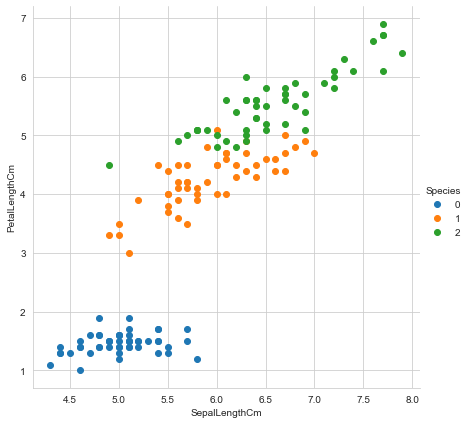

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set_style("whitegrid")
sns.FacetGrid(data, hue ="Species",
              height = 6).map(plt.scatter,
                              'SepalLengthCm',
                              'PetalLengthCm').add_legend()

In [71]:
from ipywidgets import interact
@interact(c=(-1, 100))
def choix_param(c):
    svc = svm.SVC(kernel='rbf',C=c)
    svc.fit(X_train,y_train)
    return accuracy_score(y_test, svc.predict(X_test))

interactive(children=(IntSlider(value=49, description='c', min=-1), Output()), _dom_classes=('widget-interact'…

In [72]:
from ipywidgets import interact
@interact(c=(-1, 100))
def choix_param(c):
    svc = svm.SVC(kernel='linear',C=c)
    svc.fit(X_train,y_train)
    return accuracy_score(y_test, svc.predict(X_test))

interactive(children=(IntSlider(value=49, description='c', min=-1), Output()), _dom_classes=('widget-interact'…

In [73]:
from ipywidgets import interact
@interact(c=(-1, 100),degre=(0,3))
def choix_param(c, degre):
    svc = svm.SVC(kernel='poly',C=c, degree=degre)
    svc.fit(X_train,y_train)
    return accuracy_score(y_test, svc.predict(X_test))

interactive(children=(IntSlider(value=49, description='c', min=-1), IntSlider(value=1, description='degre', ma…

### 4.3)  la matrice de confusion

In [74]:
svc = svm.SVC()
svc.fit(X_train, y_train)
confusion_matrix(y_test, svc.predict(X_test))

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

### 4.4) Analyse des résultats obtenus

### 4.5) Comparaisons des résultats des différentes approches précédentes (k-nn, NB, LDA, QDA et SVM)

### 4.6) Proposition d'une méthodologie

In [79]:
from sklearn.model_selection import LeaveOneOut

In [80]:
loo = LeaveOneOut()
loo.get_n_splits(data)

150

In [81]:
accuracys=[]
matrices=[]
metric=[]
for train_index, test_index in loo.split(data):
    kf_train_imputs=data.iloc[train_index,:-1]
    kf_test_imputs=data.iloc[test_index,:-1]
    kf_train_labells=data.iloc[train_index,-1]
    kf_test_labells=data.iloc[test_index,-1]
    svc = svm.SVC(kernel='linear')
    svc.fit(kf_train_imputs,kf_train_labells)
    kf_y_predict=svc.predict(kf_test_imputs)
    accuracys.append(accuracy_score(kf_test_labells, kf_y_predict))
    metric.append(precision_recall_fscore_support(kf_test_labells, kf_y_predict, average='micro'))
    matrices.append(confusion_matrix(kf_test_labells, kf_y_predict))
performances=pd.DataFrame(metric, columns=['Précision', 'Rappel', 'f1', 'a']).drop(columns='a')
performances["Accuracy"]=pd.DataFrame(accuracys)[0].copy()
performances

,Précision,Rappel,f1,Accuracy
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
...,...,...,...,...
145,1.0,1.0,1.0,1.0
146,1.0,1.0,1.0,1.0
147,1.0,1.0,1.0,1.0
148,1.0,1.0,1.0,1.0


In [82]:
mean(accuracys)

0.98

In [83]:
matrices

[array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=int64),
 array([[1]], dtype=